In [208]:
import numpy as np
from numpy.linalg import inv

#simple explanation of the problem: https://onlinecourses.science.psu.edu/stat501/node/382

X = np.matrix([2,3,5,1])
Y = np.matrix([2,0.5,4,4])

#add the first column with ones.
X = np.vstack([X,np.ones(len(x))]).T
#X's transpose matrx
Xtrans = X.transpose()

#XX'
X_Xtrans = Xtrans*X
#Inverse of XX'
X_Xtrans_inv = inv(X_Xtrans)
#X'Y
Xtrans_Y = Xtrans*Y.transpose()
#inverse(XX')(X'Y), the final weighs[b0,b1,...,bn]
W = X_Xtrans_inv*Xtrans_Y
W

matrix([[ 0.07142857],
        [ 2.42857143]])

In [204]:
X = np.array([2,3,5,1])
Y = np.array([2,1,4,2])

A = np.vstack([X,np.ones(len(X))]).T

m, c = np.linalg.lstsq(A, Y)[0]
print(m, c)

0.485714285714 0.914285714286


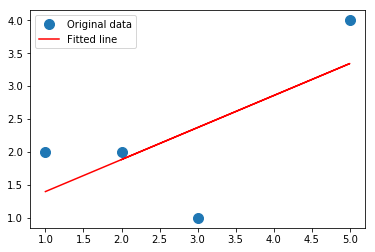

In [205]:
import matplotlib.pyplot as plt
plt.plot(X, Y, 'o', label='Original data', markersize=10)
plt.plot(X, m*X + c, 'r', label='Fitted line')
plt.legend()
plt.show()

In [209]:
# https://stackoverflow.com/questions/32114054/matrix-inversion-without-numpy
def transposeMatrix(m):
    return map(list,zip(*m))

def getMatrixMinor(m,i,j):
    return [row[:j] + row[j+1:] for row in (m[:i]+m[i+1:])]

def getMatrixDeternminant(m):
    #base case for 2x2 matrix
    if len(m) == 2:
        return m[0][0]*m[1][1]-m[0][1]*m[1][0]

    determinant = 0
    for c in range(len(m)):
        determinant += ((-1)**c)*m[0][c]*getMatrixDeternminant(getMatrixMinor(m,0,c))
    return determinant

def getMatrixInverse(m):
    determinant = getMatrixDeternminant(m)
    #special case for 2x2 matrix:
    if len(m) == 2:
        return [[m[1][1]/determinant, -1*m[0][1]/determinant],
                [-1*m[1][0]/determinant, m[0][0]/determinant]]

    #find matrix of cofactors
    cofactors = []
    for r in range(len(m)):
        cofactorRow = []
        for c in range(len(m)):
            minor = getMatrixMinor(m,r,c)
            cofactorRow.append(((-1)**(r+c)) * getMatrixDeternminant(minor))
        cofactors.append(cofactorRow)
    cofactors = transposeMatrix(cofactors)
    for r in range(len(cofactors)):
        for c in range(len(cofactors)):
            cofactors[r][c] = cofactors[r][c]/determinant
    return cofactors

In [2]:
(2/34*2.01+4/34*4.01-2/34*(-2.01)-3/34*(-3.01)-1/34*(-1.01))

1.003529411764706